# **IMPORT DATA**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [ ]:
df = pd.read_csv('bodyfat1.csv')
df.describe(include= 'all')


,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


# **DATA EXPLORATION**

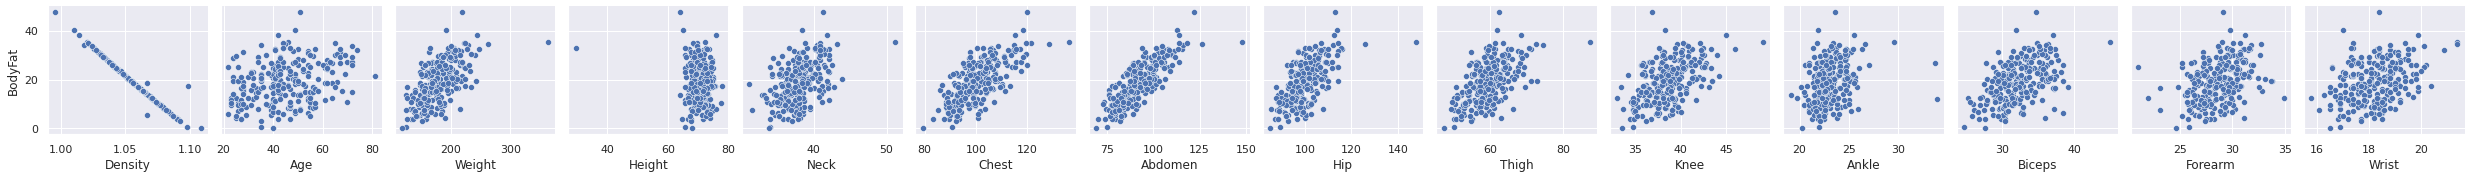

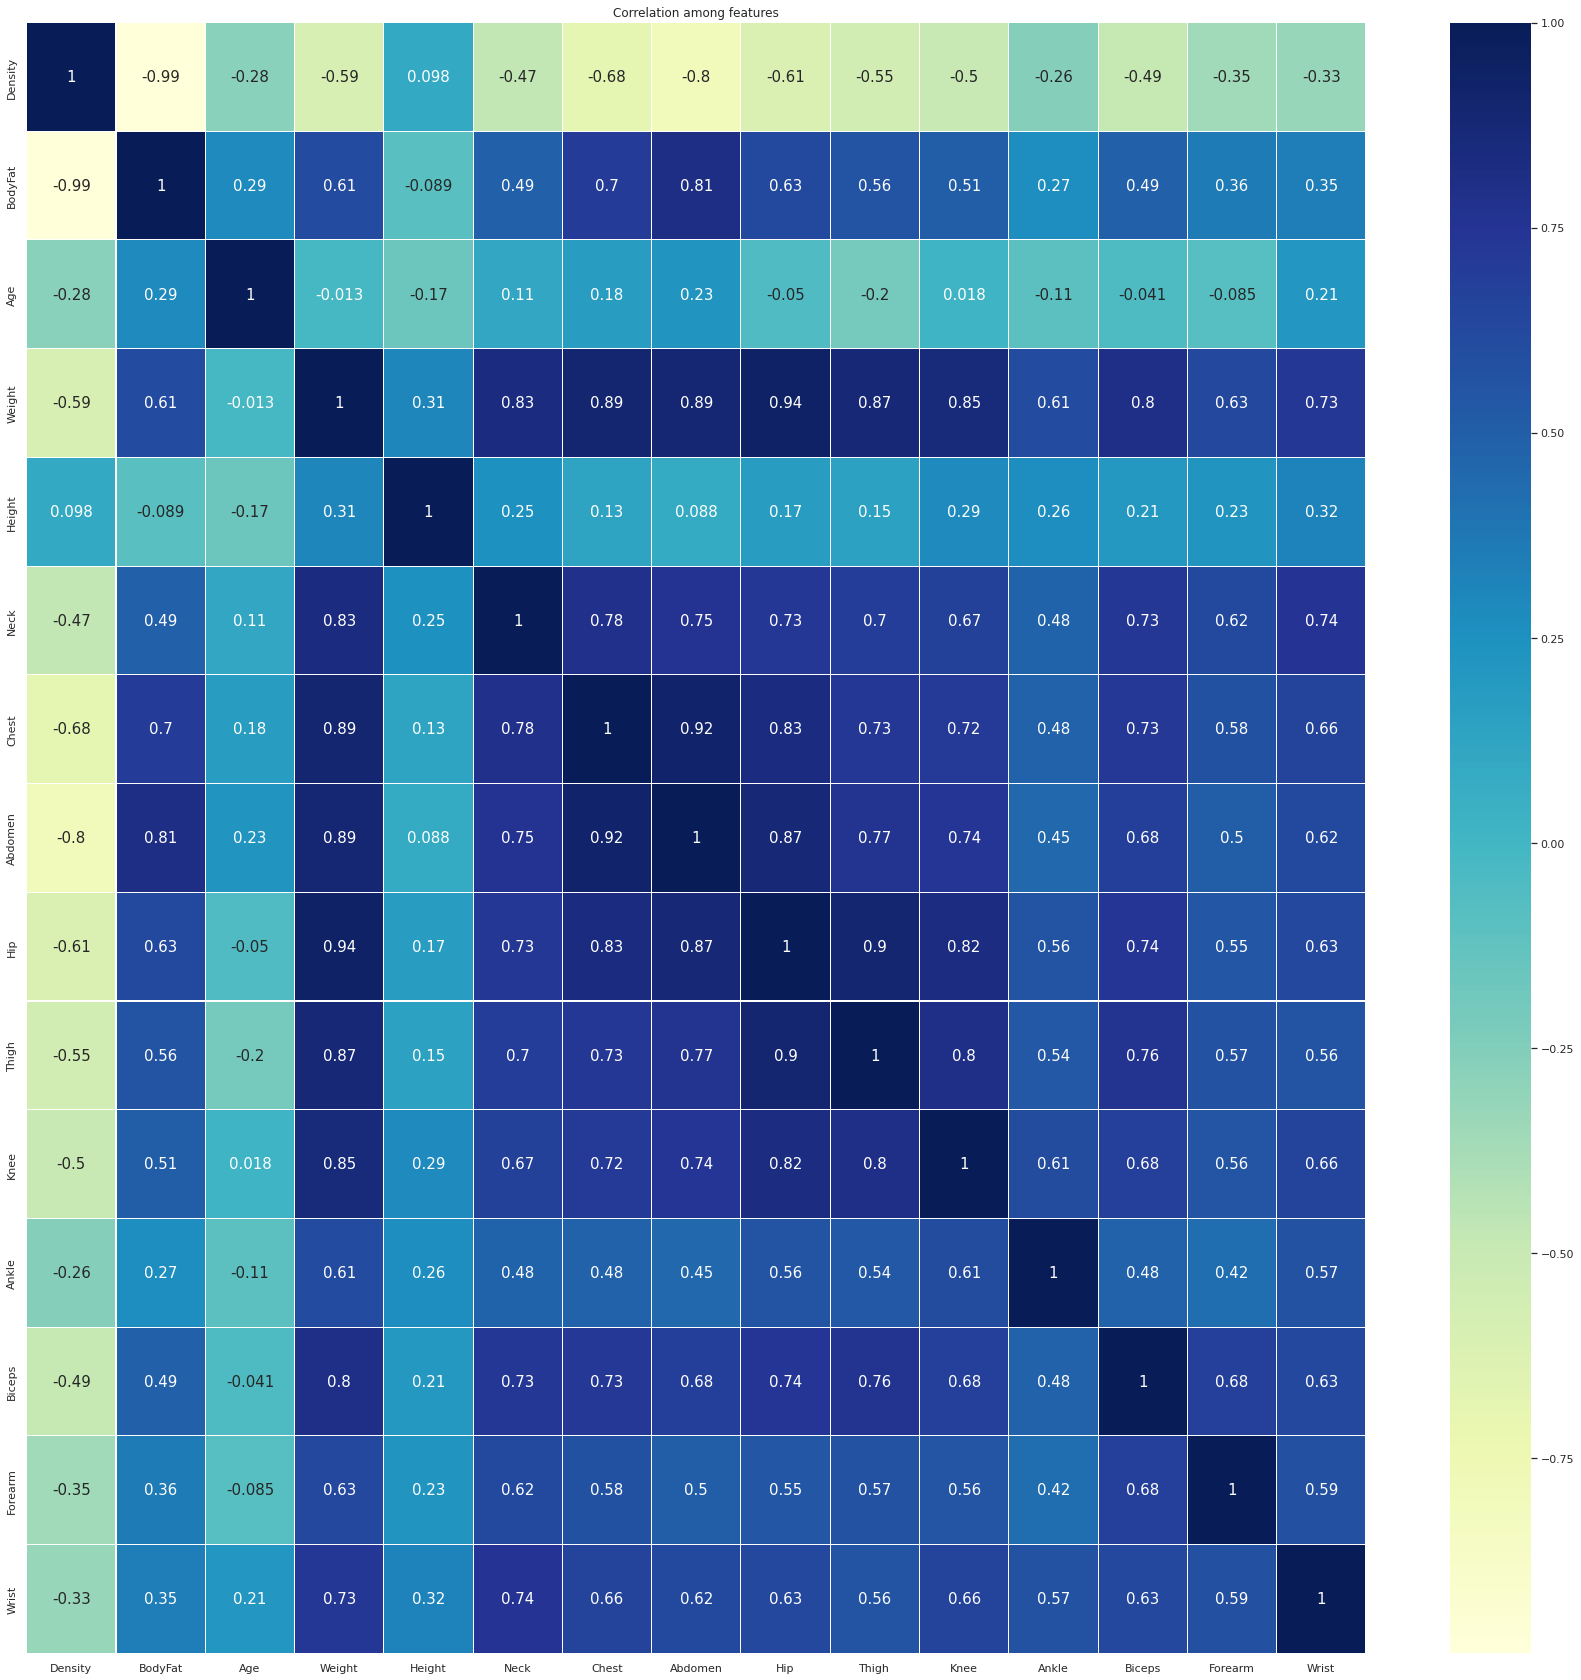

In [ ]:
import seaborn
seaborn.heatmap(data.corr())

In [ ]:
def show_feature_importanse(df):
    plt.figure(figsize=(10,7))
    lin_imp = abs(df.corr().BodyFat).sort_values(ascending=False).iloc[1:]
    sns.barplot(lin_imp.index, lin_imp.values,palette="Blues_r")
    plt.yticks([0.4,0.5,0.7,1])
    plt.title("Feature importances",fontsize=15)
    plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


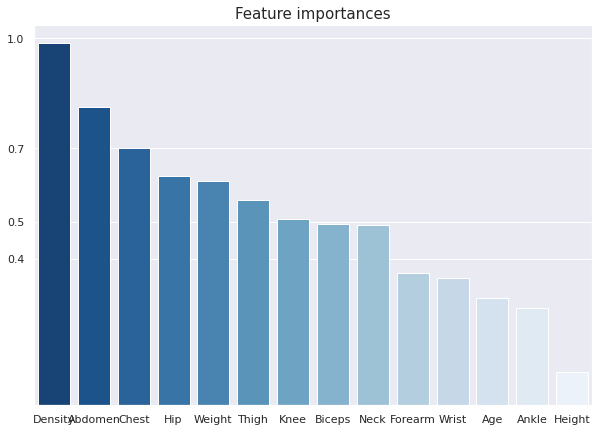

In [ ]:
show_feature_importanse(df)


# **MODEL AND ANALYST**

# **Model (density + abdomen + chest )**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = df[['Density','Abdomen','Chest']]
y = df['BodyFat']


R2 : 0.9959924922721907
RMSE: 0.559887431508803
intercept : 19.450568181818234
                                 OLS Regression Results                                
Dep. Variable:                BodyFat   R-squared (uncentered):                   0.143
Model:                            OLS   Adj. R-squared (uncentered):              0.128
Method:                 Least Squares   F-statistic:                              9.647
Date:                Tue, 19 Jul 2022   Prob (F-statistic):                    6.37e-06
Time:                        13:27:41   Log-Likelihood:                         -772.58
No. Observations:                 176   AIC:                                      1551.
Df Residuals:                     173   BIC:                                      1561.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err         

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


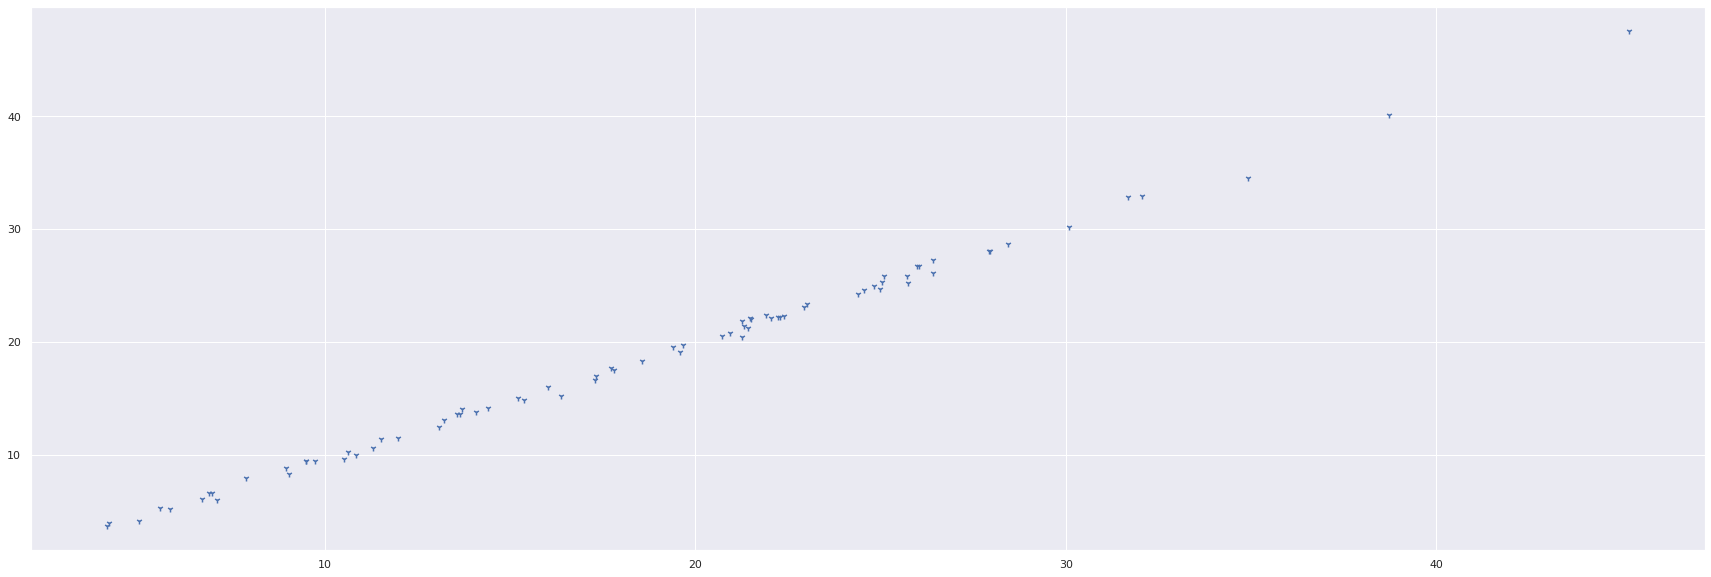

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state= 30)

scalerX = StandardScaler()
scalerY = StandardScaler()

x_train_scaled = scalerX.fit_transform(x_train)
x_test_scaled = scalerX.transform(x_test)

lr = LinearRegression().fit(x_train_scaled, y_train)
lr.score(x_test_scaled, y_test)

y_pred = lr.predict(x_test_scaled)

r2_score_lr = r2_score(y_test, y_pred)
rmse_lr = mean_squared_error(y_test, y_pred, squared = False)

print(f'R2 : {r2_score_lr}')
print(f'RMSE: {rmse_lr}')
print(f'intercept : {lr.intercept_}')

plt.scatter(y_pred, y_test, marker="1")
plt.xlabel='Predicted BodyFat'
plt.ylabel='Real BodyFat'

############# MODEL SUMMARY ##################
scalerX = StandardScaler()
scalerY = StandardScaler()

x_train_scaled = scalerX.fit_transform(x_train)
x_test_scaled = scalerX.transform(x_test)


#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y_train, x_train_scaled).fit()

#view model summary
print(model.summary())

<Figure size 2400x1600 with 0 Axes>

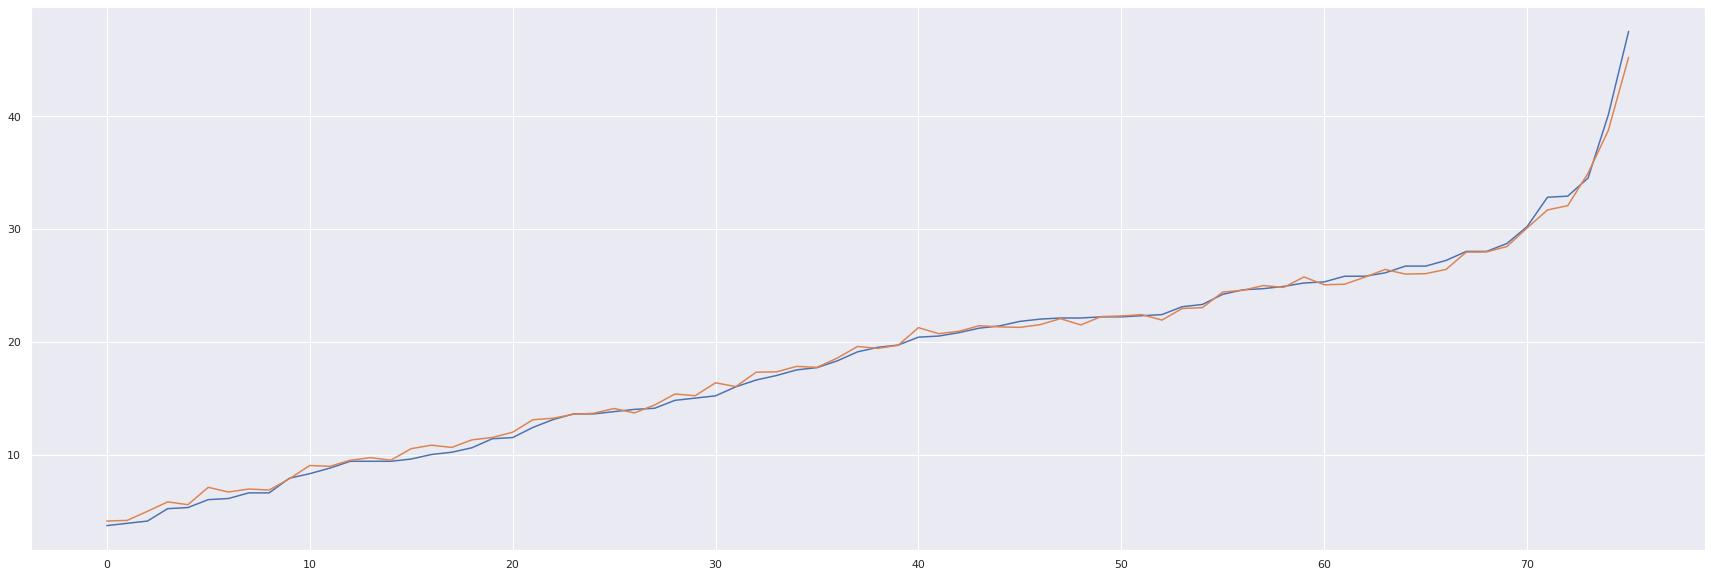

<Figure size 2400x1600 with 0 Axes>

In [ ]:
from matplotlib.pyplot import plot, figure
df = pd.DataFrame({"Actual":y_test, "Predicted": lr.predict(x_test_scaled)})
df = df.sort_values(by="Actual")
plot((df["Actual"].to_numpy()))
plot(df["Predicted"].to_numpy())
figure(figsize=(30,20), dpi=80)

# **Model (density + abdomen + chest +hip+weight + thigh+knee+biceps+neck)**

In [ ]:
df1 = pd.read_csv('bodyfat1.csv')


,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


R2 : 0.9954518287265764
RMSE: 0.5964608452508849
intercept : 19.45056818181823
19.45056818181823
                                 OLS Regression Results                                
Dep. Variable:                BodyFat   R-squared (uncentered):                   0.143
Model:                            OLS   Adj. R-squared (uncentered):              0.097
Method:                 Least Squares   F-statistic:                              3.106
Date:                Tue, 19 Jul 2022   Prob (F-statistic):                     0.00177
Time:                        14:01:02   Log-Likelihood:                         -772.57
No. Observations:                 176   AIC:                                      1563.
Df Residuals:                     167   BIC:                                      1592.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


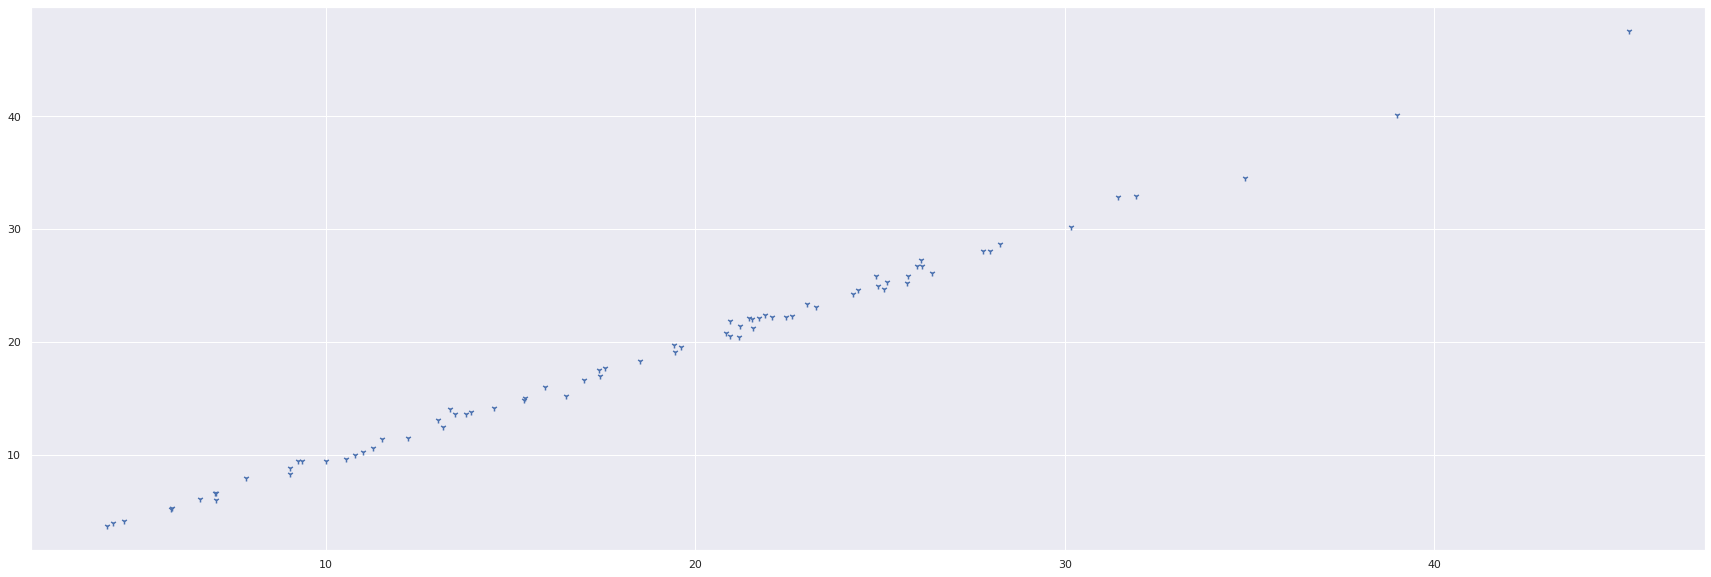

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
x = df1[['Density','Weight','Chest','Abdomen','Hip','Thigh','Knee','Biceps','Neck']]
y = df1['BodyFat']

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state= 30)

scalerX = StandardScaler()
scalerY = StandardScaler()

x_train_scaled = scalerX.fit_transform(x_train)
x_test_scaled = scalerX.transform(x_test)

lr = LinearRegression().fit(x_train_scaled, y_train)
lr.score(x_test_scaled, y_test)

y_pred = lr.predict(x_test_scaled)

r2_score_lr = r2_score(y_test, y_pred)
rmse_lr = mean_squared_error(y_test, y_pred, squared = False)

print(f'R2 : {r2_score_lr}')
print(f'RMSE: {rmse_lr}')
print(f'intercept : {lr.intercept_}')

plt.scatter(y_pred, y_test, marker="1")
plt.xlabel='Predicted BodyFat'
plt.ylabel='Real BodyFat'

print(lr.intercept_)
############# MODEL SUMMARY ##################
scalerX = StandardScaler()
scalerY = StandardScaler()

x_train_scaled = scalerX.fit_transform(x_train)
x_test_scaled = scalerX.transform(x_test)


#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y_train, x_train_scaled).fit()

#view model summary
print(model.summary())


<Figure size 2400x1600 with 0 Axes>

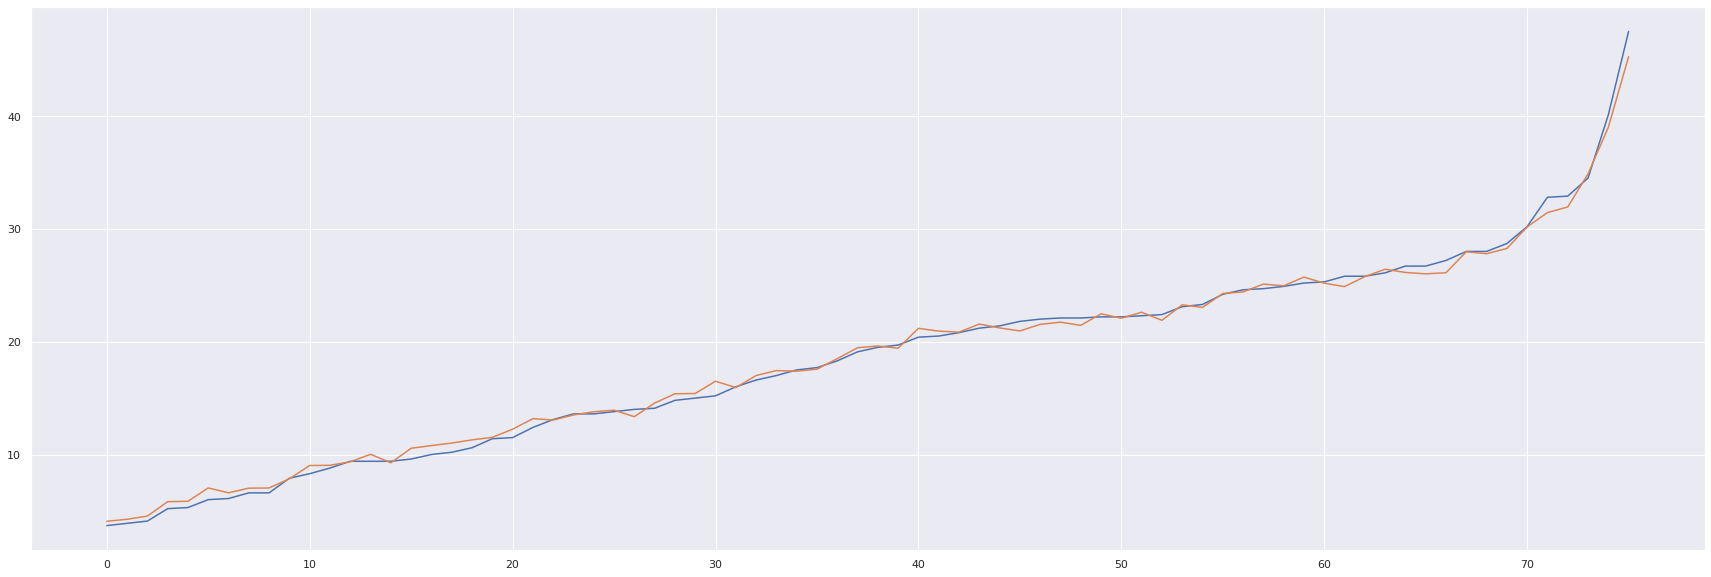

<Figure size 2400x1600 with 0 Axes>

In [ ]:
from matplotlib.pyplot import plot, figure
df = pd.DataFrame({"Actual":y_test, "Predicted": lr.predict(x_test_scaled)})
df = df.sort_values(by="Actual")
plot((df["Actual"].to_numpy()))
plot(df["Predicted"].to_numpy())
figure(figsize=(30,20), dpi=80)

# **Model (density )**

In [6]:
df1 = pd.read_csv('bodyfat1.csv')
from sklearn.model_selection import train_test_split


R2 : 0.9975103773207594
RMSE: 0.44129631403184083
intercept : 19.450568181818237
19.450568181818237


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


ValueError: ignored

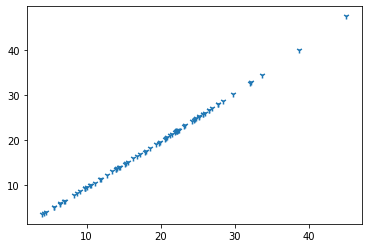

In [20]:
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
x = df1[['Density']]
y = df1['BodyFat']

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state= 30)

scalerX = StandardScaler()
scalerY = StandardScaler()

x_train_scaled = scalerX.fit_transform(x_train)
x_test_scaled = scalerX.transform(x_test)

lr = LinearRegression().fit(x_train_scaled, y_train)
lr.score(x_test_scaled, y_test)

y_pred = lr.predict(x_test_scaled)

r2_score_lr = r2_score(y_test, y_pred)
rmse_lr = mean_squared_error(y_test, y_pred, squared = False)

print(f'R2 : {r2_score_lr}')
print(f'RMSE: {rmse_lr}')
print(f'intercept : {lr.intercept_}')

plt.scatter(y_pred, y_test, marker="1")
plt.xlabel='Predicted BodyFat'
plt.ylabel='Real BodyFat'

print(lr.intercept_)
############# MODEL SUMMARY ##################
scalerX = StandardScaler()
scalerY = StandardScaler()

x_train_scaled = scalerX.fit_transform(x_train)
x_test_scaled = scalerX.transform(x_test)


#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y_train, x_train_scaled).fit()

#view model summary
print(model.summary())


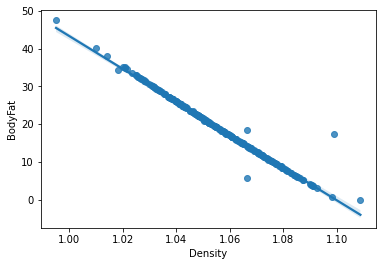

In [22]:
ax = sns.regplot(x="Density", y="BodyFat", data=df1)